### Breast cancer Analysis

In [0]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV

# To divide train and test set
from sklearn.model_selection import train_test_split

# To build the models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier


# To evaluate the models
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_curve,classification_report
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
names = ['id','Diagnosis',
'mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave_points','mean_symmetry','mean_fractal_dim',
'se_radius','se_texture','se_perimeter','se_area','se_smoothness','se_compactness','se_concavity','se_concave_points','se_symmetry','se_fractal_dim',
'worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave_points','worst_symmetry','worst_fractal_dim']

In [0]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',index_col='id',names=names ,sep=',',header=None)

In [0]:
data.head()

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dim,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dim,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dim
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
print("Dimesions of Data :")
print("Rows :",data.shape[0])
print("Columns :",data.shape[1])

Dimesions of Data :
Rows : 569
Columns : 31


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diagnosis             569 non-null    object 
 1   mean_radius           569 non-null    float64
 2   mean_texture          569 non-null    float64
 3   mean_perimeter        569 non-null    float64
 4   mean_area             569 non-null    float64
 5   mean_smoothness       569 non-null    float64
 6   mean_compactness      569 non-null    float64
 7   mean_concavity        569 non-null    float64
 8   mean_concave_points   569 non-null    float64
 9   mean_symmetry         569 non-null    float64
 10  mean_fractal_dim      569 non-null    float64
 11  se_radius             569 non-null    float64
 12  se_texture            569 non-null    float64
 13  se_perimeter          569 non-null    float64
 14  se_area               569 non-null    float64
 15  se_smoothness   

In [0]:
data['Diagnosis'][data['Diagnosis']== 'B'] = 'Benign'
data['Diagnosis'][data['Diagnosis']== 'M'] = 'Malignant'

In [0]:
data['Diagnosis'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [0]:
print("All attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': data.isnull().sum(), '%_missing': data.isnull().mean()*100,
                           'datatype':data.dtypes})
null_values

All attributes with no. of missing value in data : 


,total_missing,%_missing,datatype
Diagnosis,0,0.0,object
mean_radius,0,0.0,float64
mean_texture,0,0.0,float64
mean_perimeter,0,0.0,float64
mean_area,0,0.0,float64
mean_smoothness,0,0.0,float64
mean_compactness,0,0.0,float64
mean_concavity,0,0.0,float64
mean_concave_points,0,0.0,float64
mean_symmetry,0,0.0,float64


In [0]:
data['Diagnosis'].value_counts()

Benign       357
Malignant    212
Name: Diagnosis, dtype: int64

In [0]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dim,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dim,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dim
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Sperating categorical and numerical columns

In [0]:
## Categorical Variables
cat = [i for i in data.columns if data[i].dtype =='O']

## Numerical Variables
num = [i for i in data.columns if data[i].dtype!='O']

#### Scaling the data

In [0]:
scale = StandardScaler()
data[num] = scale.fit_transform(data[num])

In [0]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dim,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dim,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dim
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,2.475807e-16,-9.912009e-17,-2.968237e-16,-1.088760e-16,4.426014e-16,1.958988e-16,1.678017e-16,2.185325e-17,1.523874e-16,-5.658430e-17,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16,2.321908e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447e+00,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-6.744900e-01,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-1.404958e-01,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,4.726567e-01,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601e+00,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


#### Exploratory data Analysis

In [0]:
data.columns

Index(['Diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dim', 'se_radius',
       'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
       'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
       'se_fractal_dim', 'worst_radius', 'worst_texture', 'worst_perimeter',
       'worst_area', 'worst_smoothness', 'worst_compactness',
       'worst_concavity', 'worst_concave_points', 'worst_symmetry',
       'worst_fractal_dim'],
      dtype='object')

In [0]:
mean_col = ['Diagnosis','mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dim']
se_col = ['Diagnosis','se_radius',
       'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
       'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
       'se_fractal_dim']
worst_col = ['Diagnosis','worst_radius', 'worst_texture', 'worst_perimeter',
       'worst_area', 'worst_smoothness', 'worst_compactness',
       'worst_concavity', 'worst_concave_points', 'worst_symmetry',
       'worst_fractal_dim']

In [0]:
def patch(ax,total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height*100)/total),ha="center")

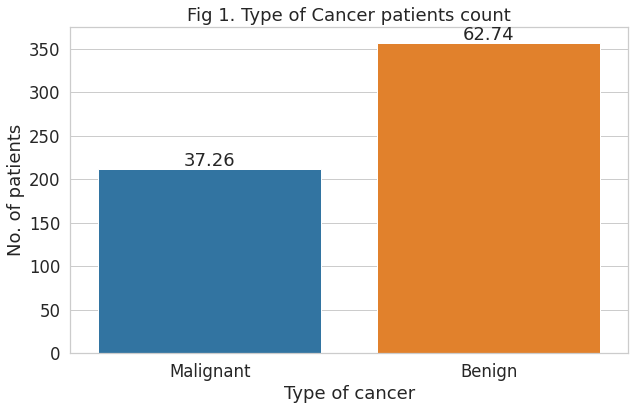

In [0]:
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)

ax = sns.countplot(data['Diagnosis']);
plt.xlabel("Type of cancer");
plt.ylabel("No. of patients");
plt.title("Fig 1. Type of Cancer patients count")
patch(ax,len(data))

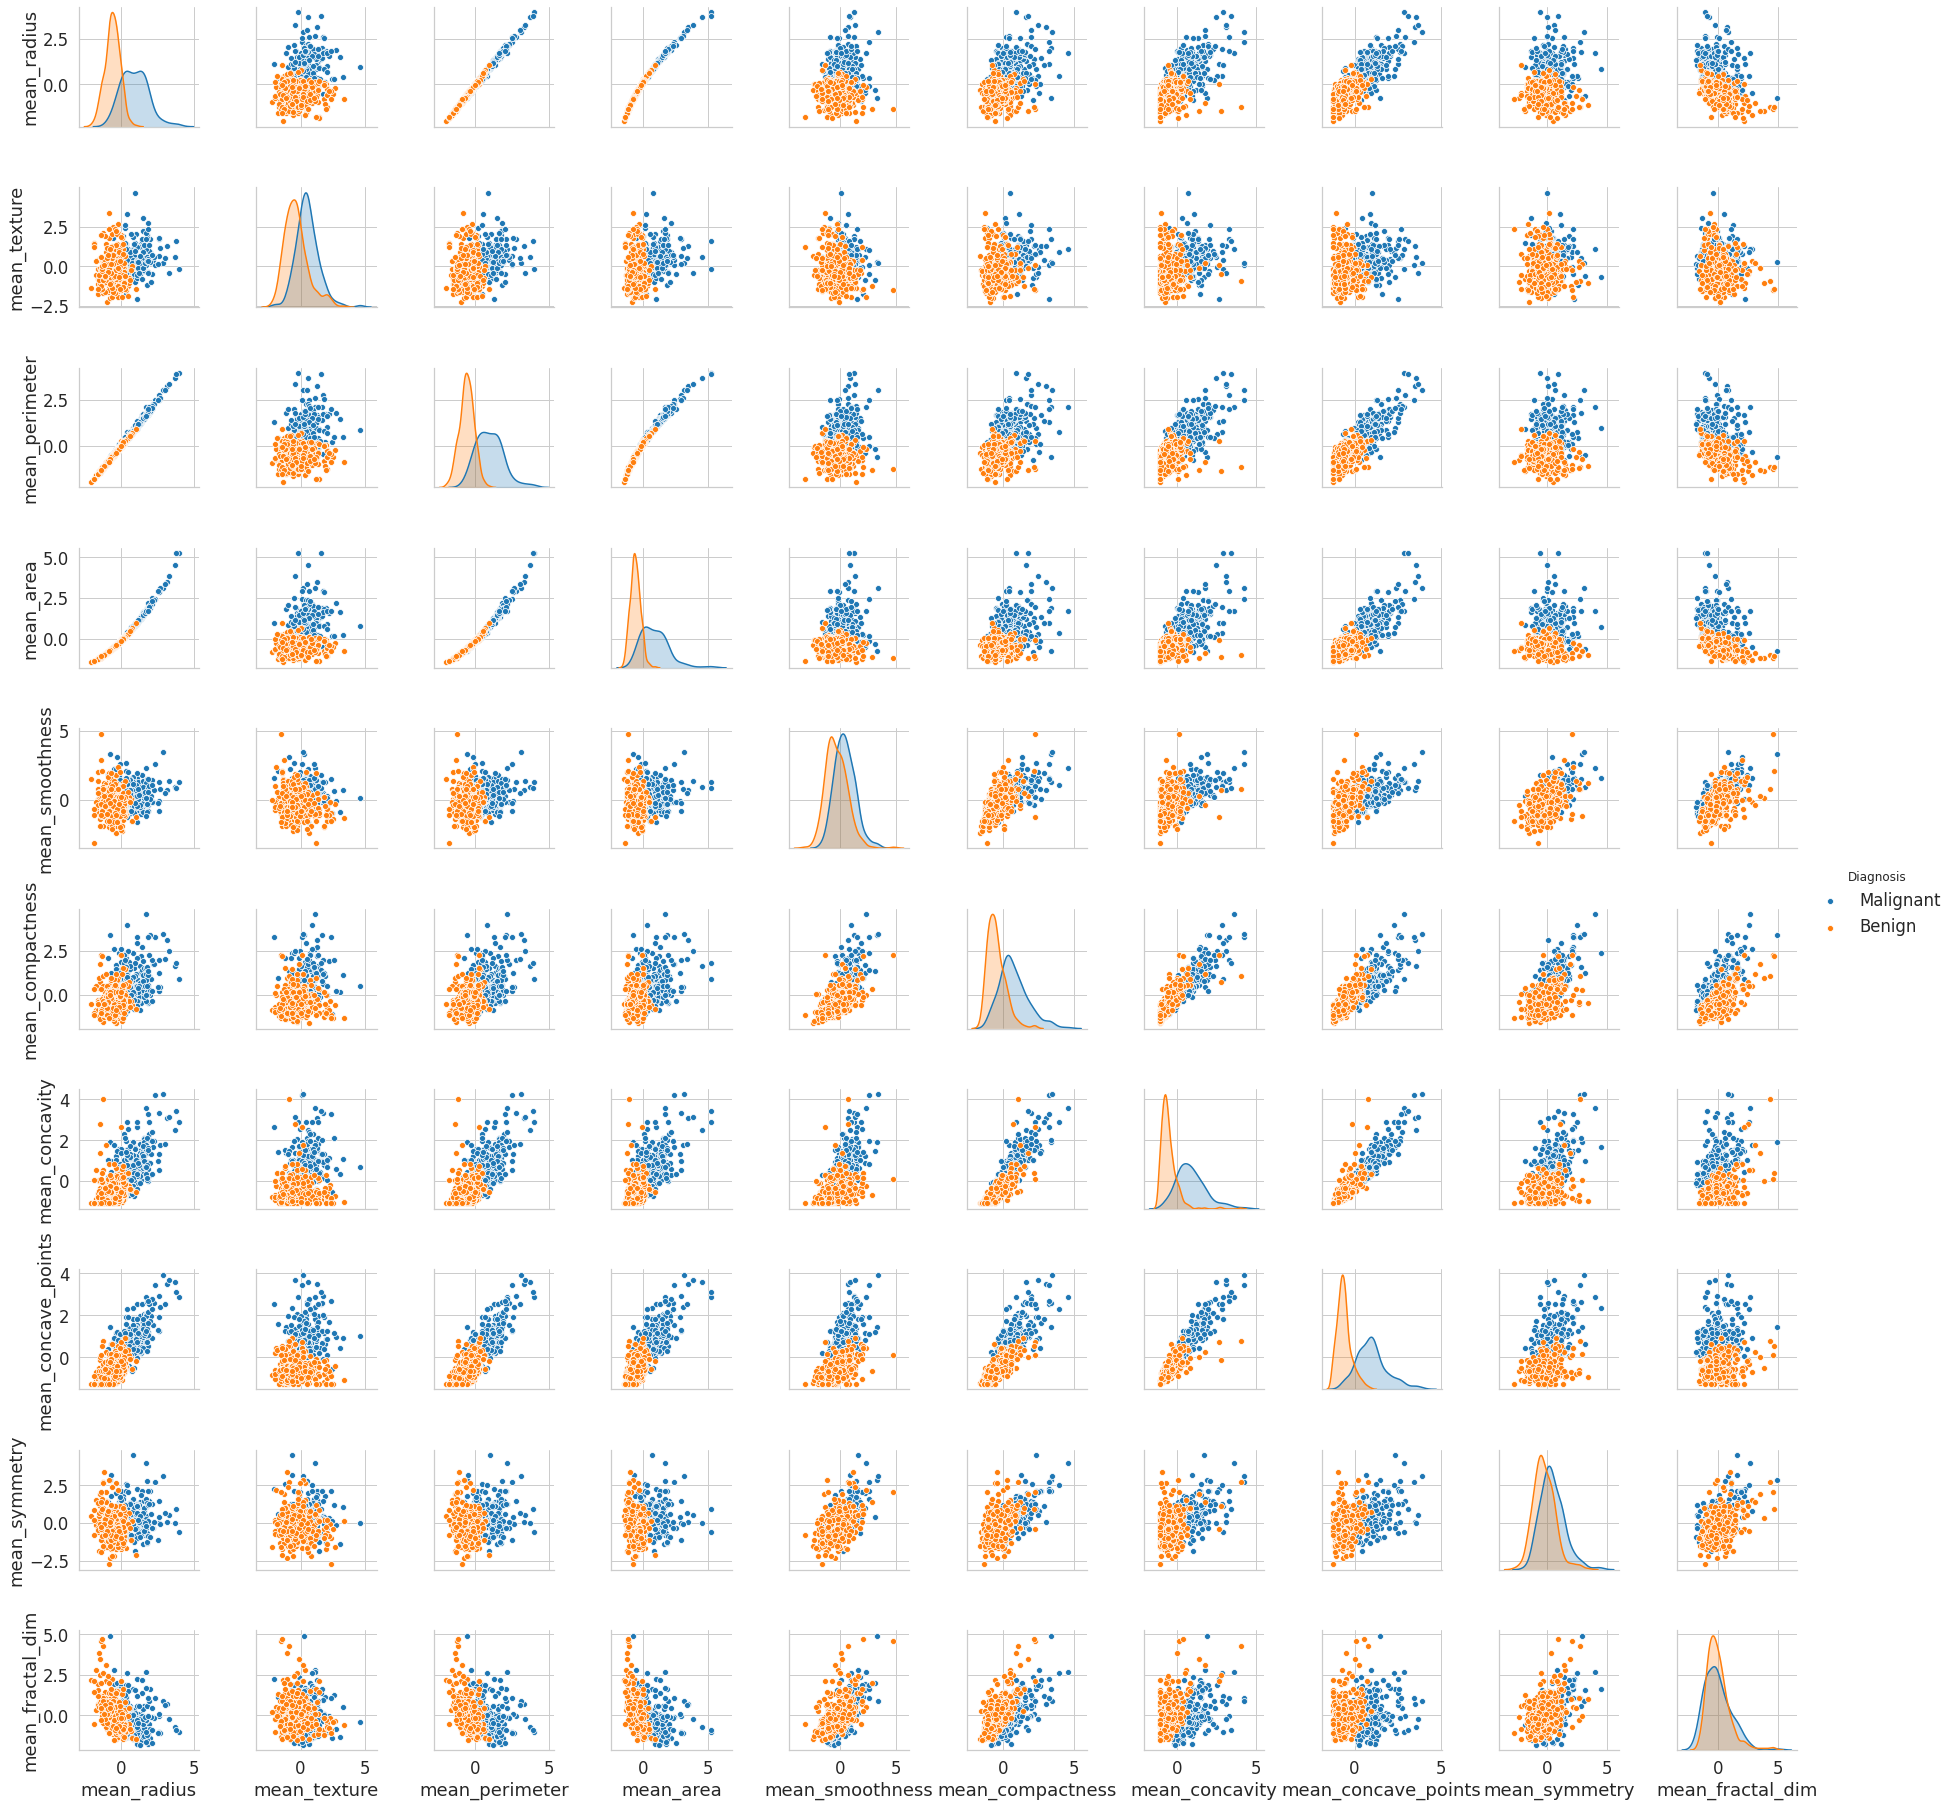

In [0]:
sns.pairplot(data[mean_col],hue='Diagnosis')

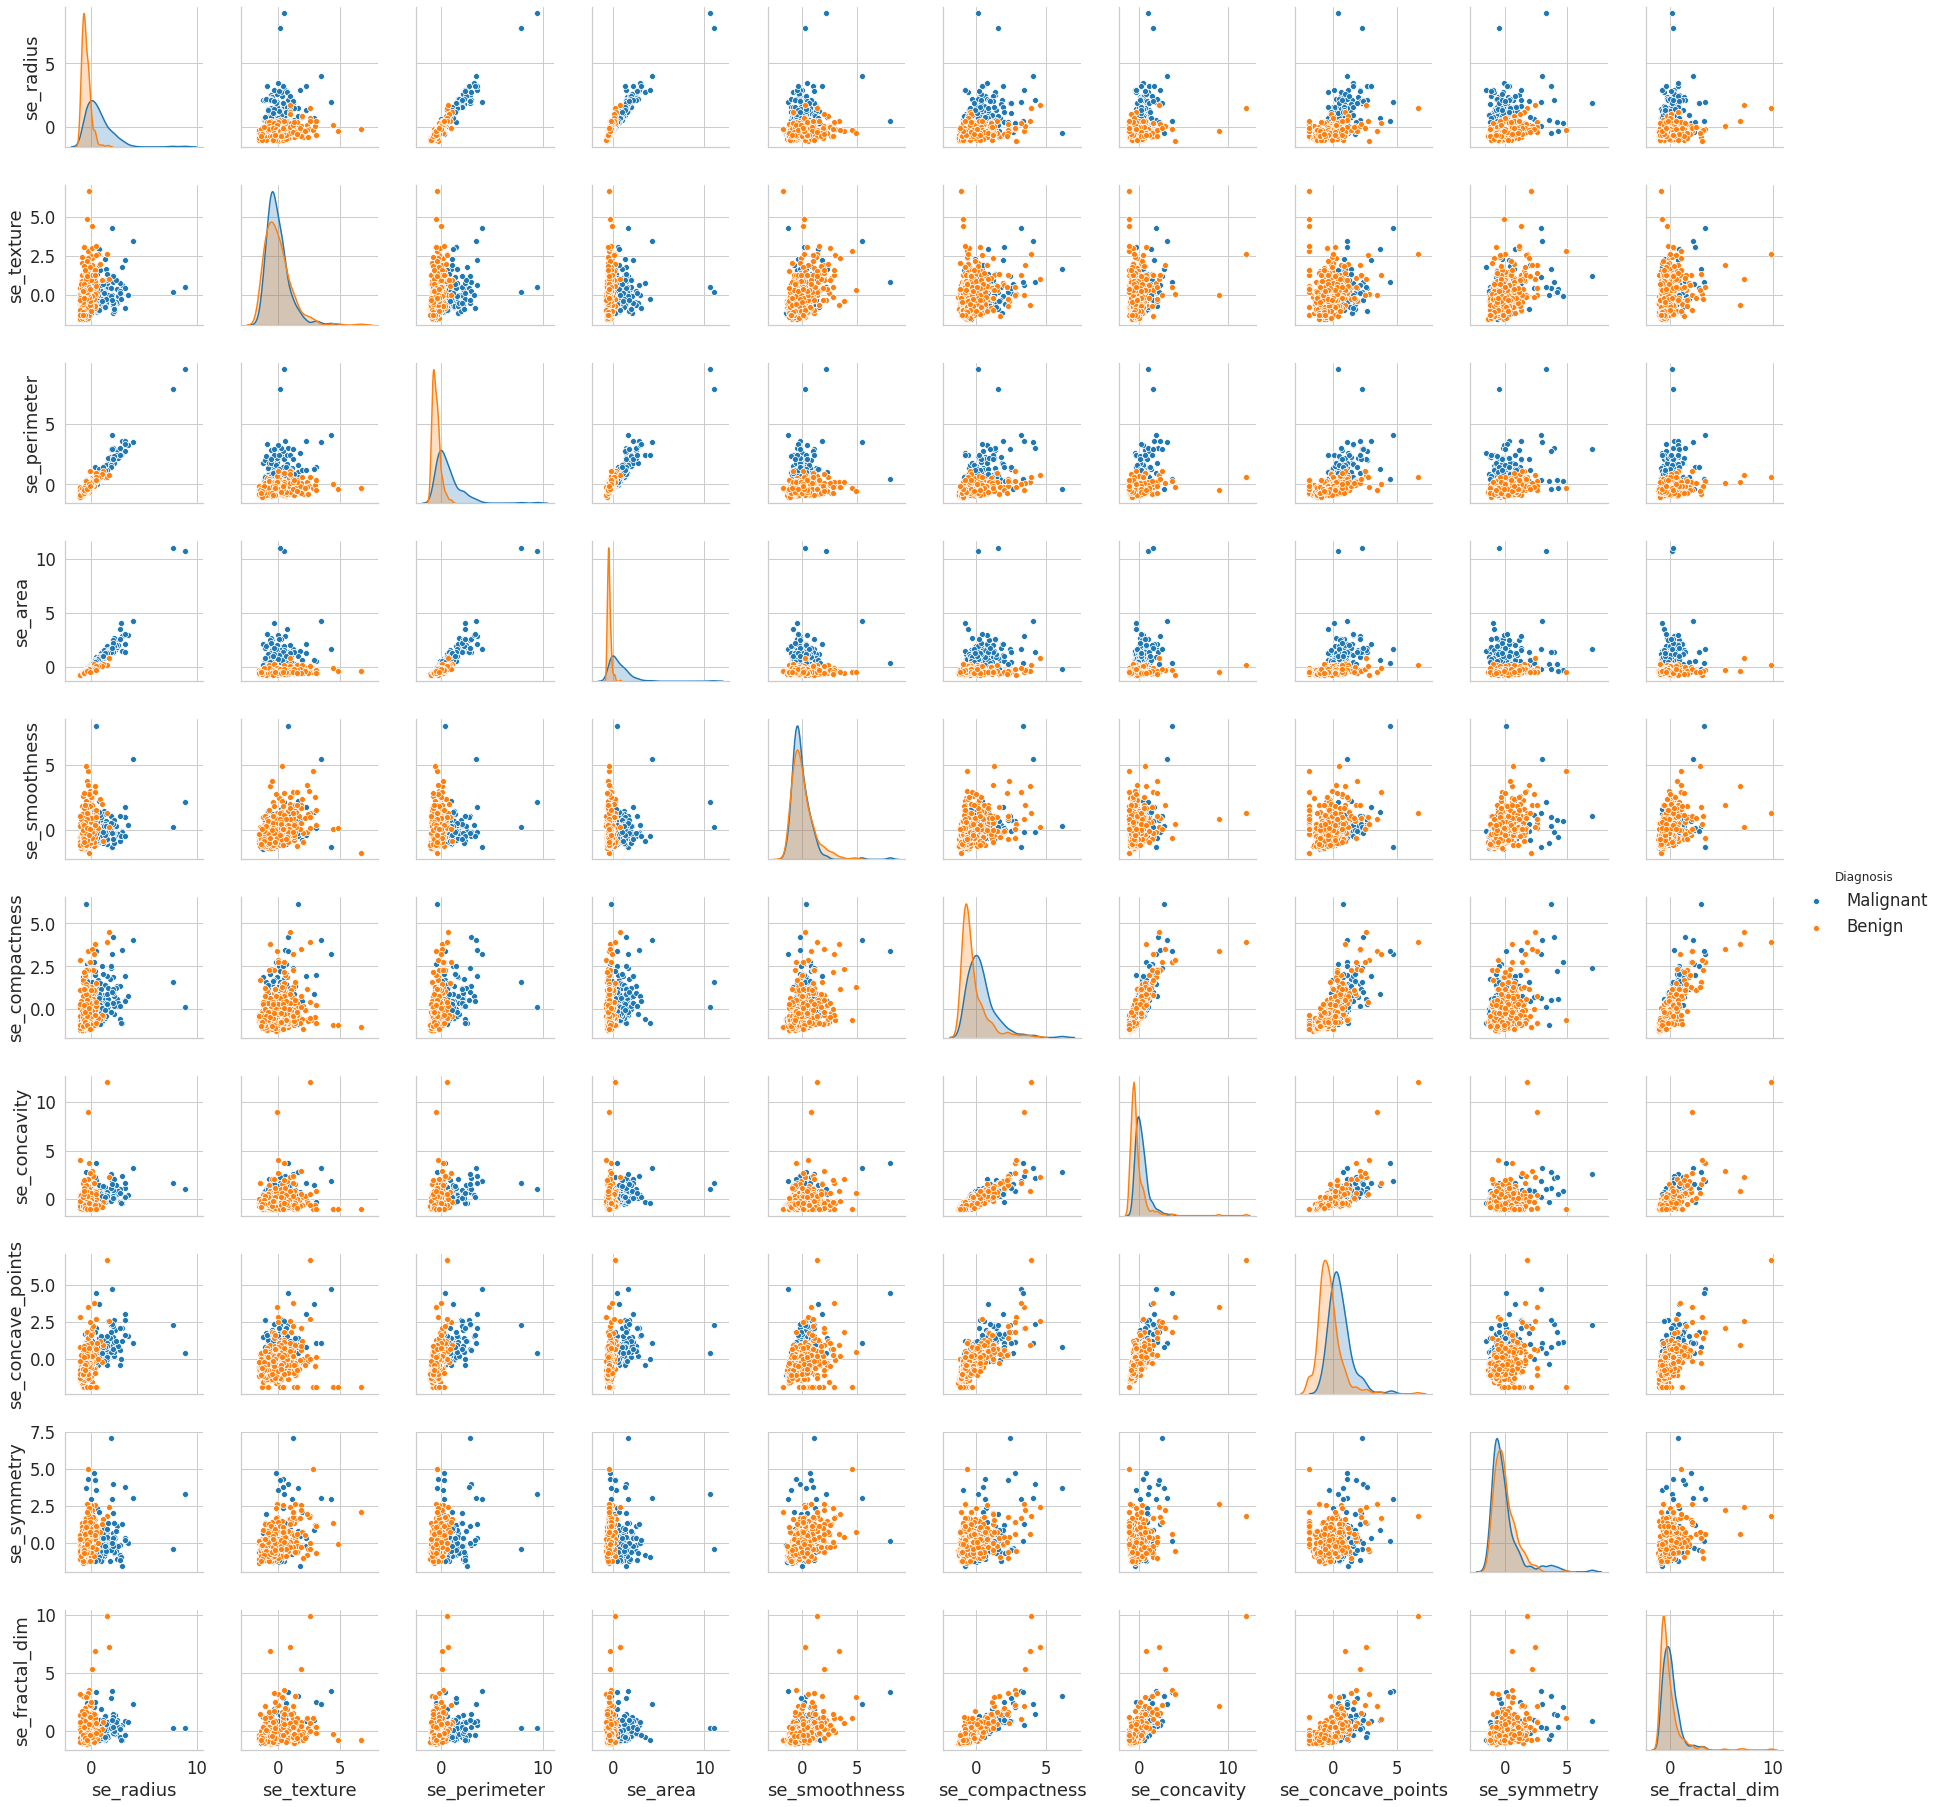

In [0]:
sns.pairplot(data[se_col],hue='Diagnosis');

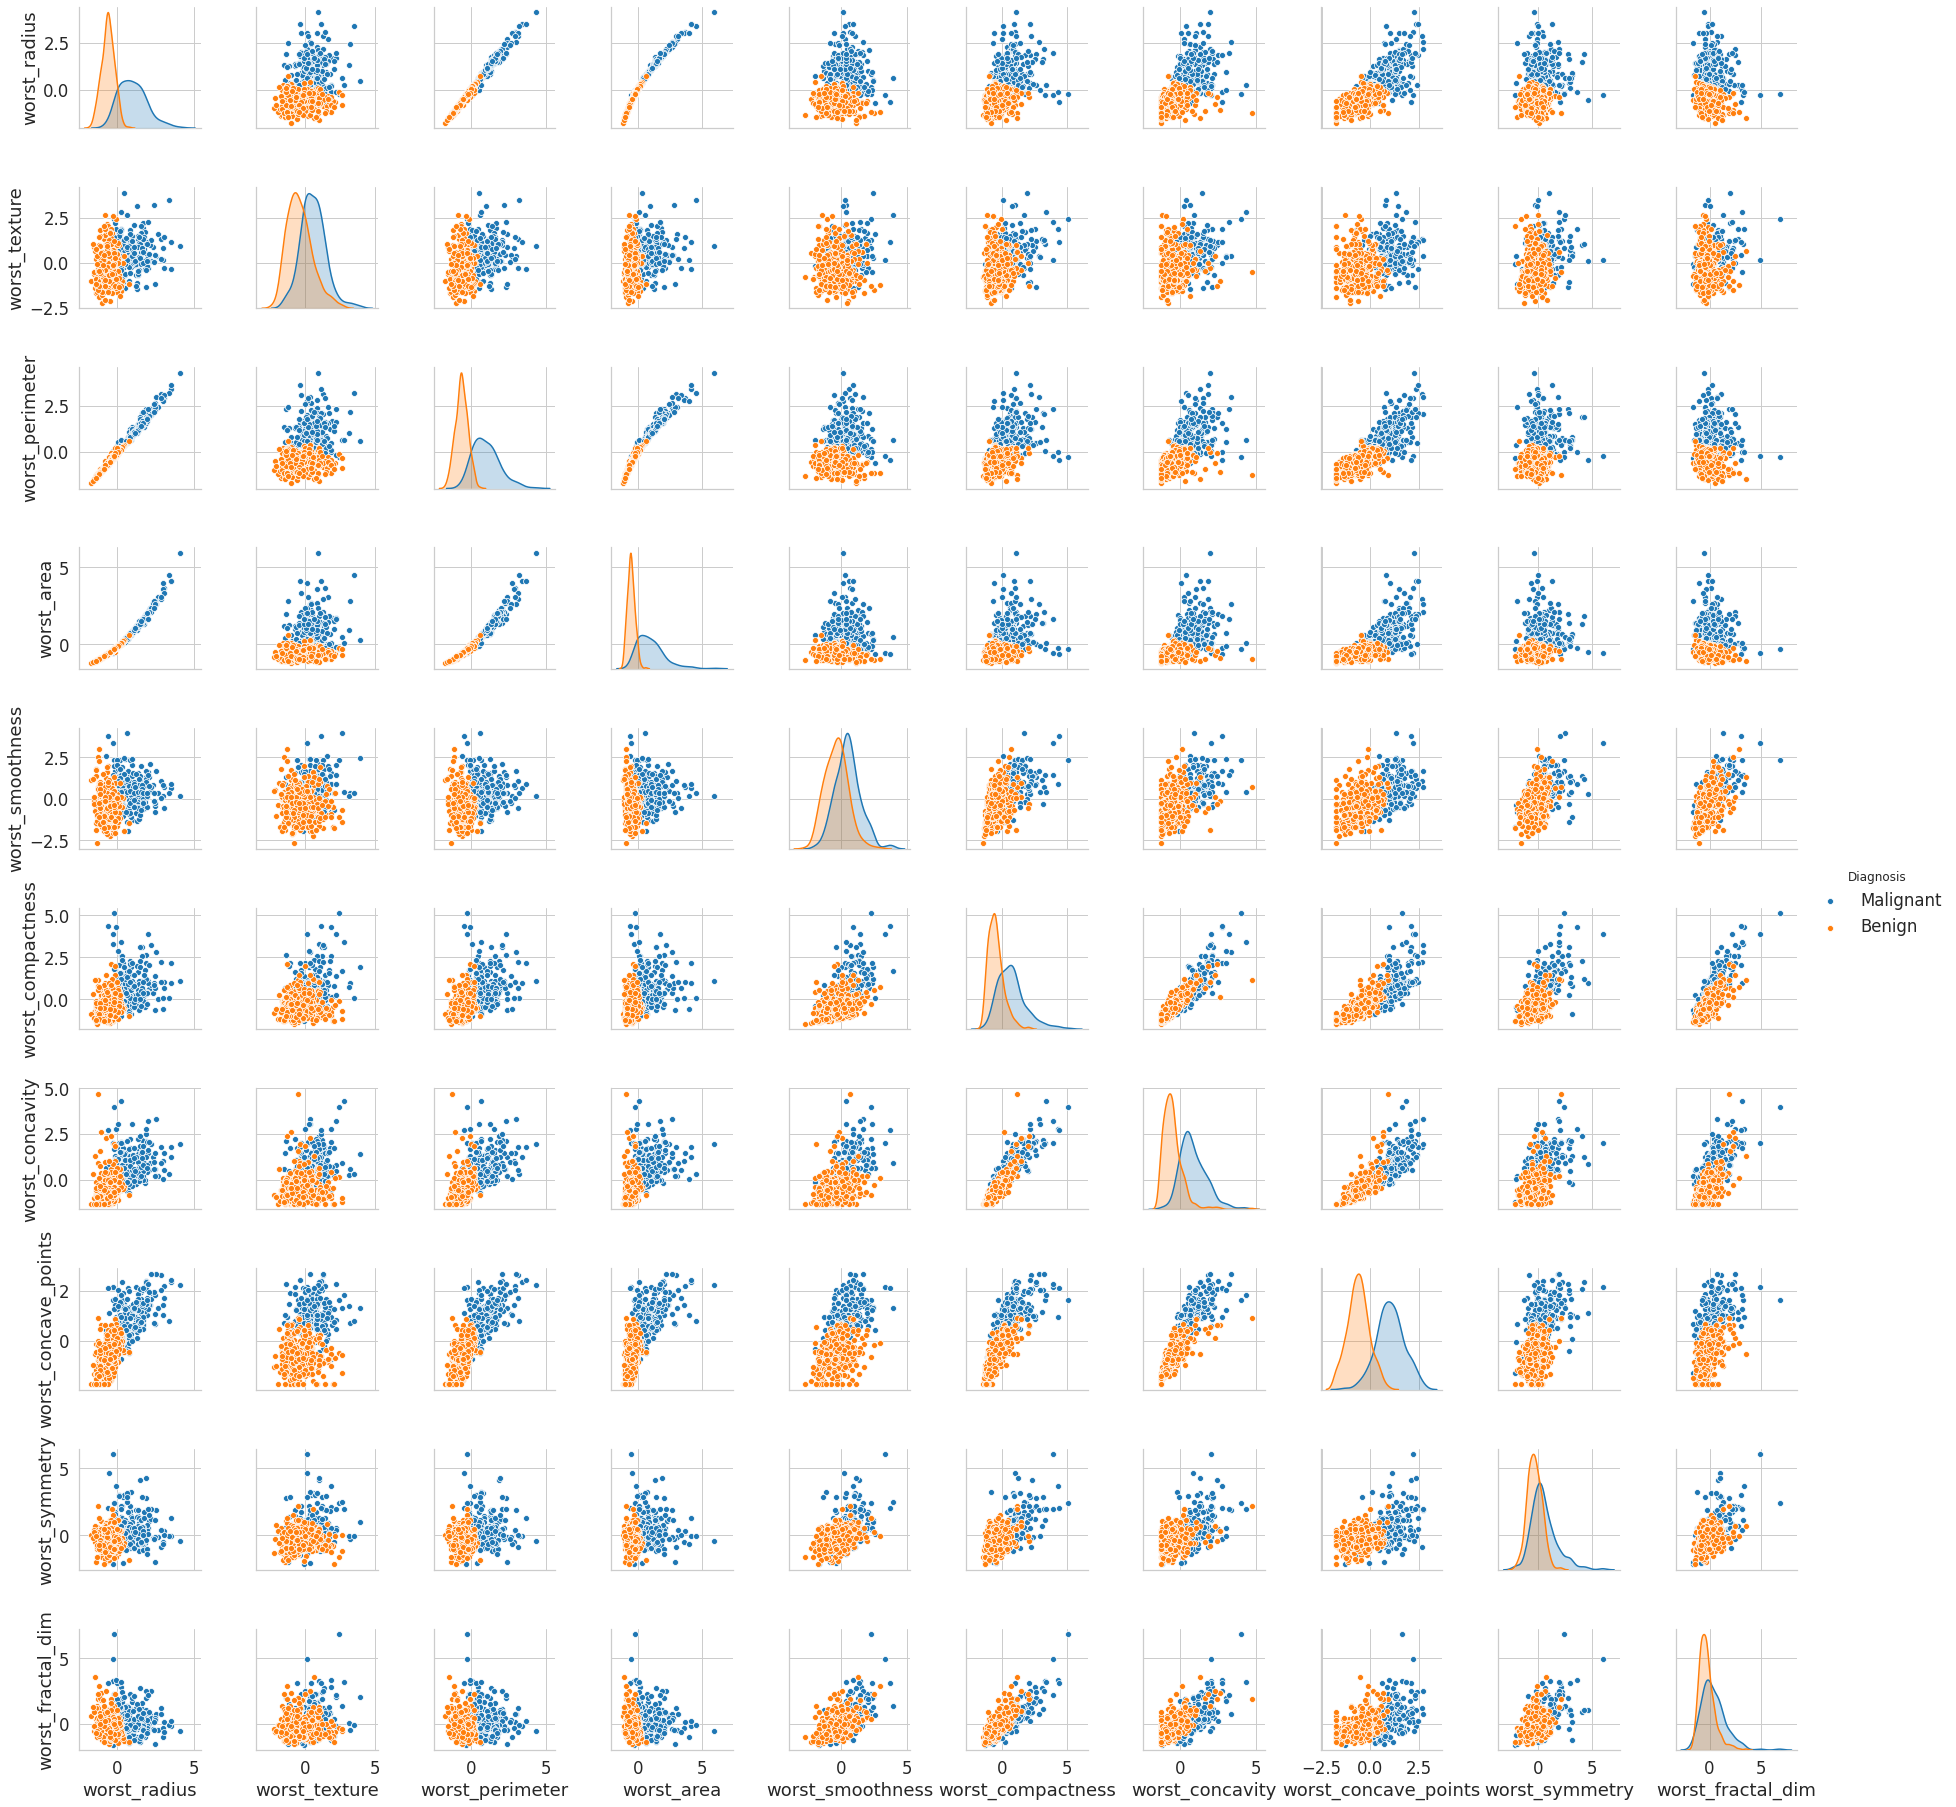

In [0]:
sns.pairplot(data[worst_col],hue='Diagnosis');

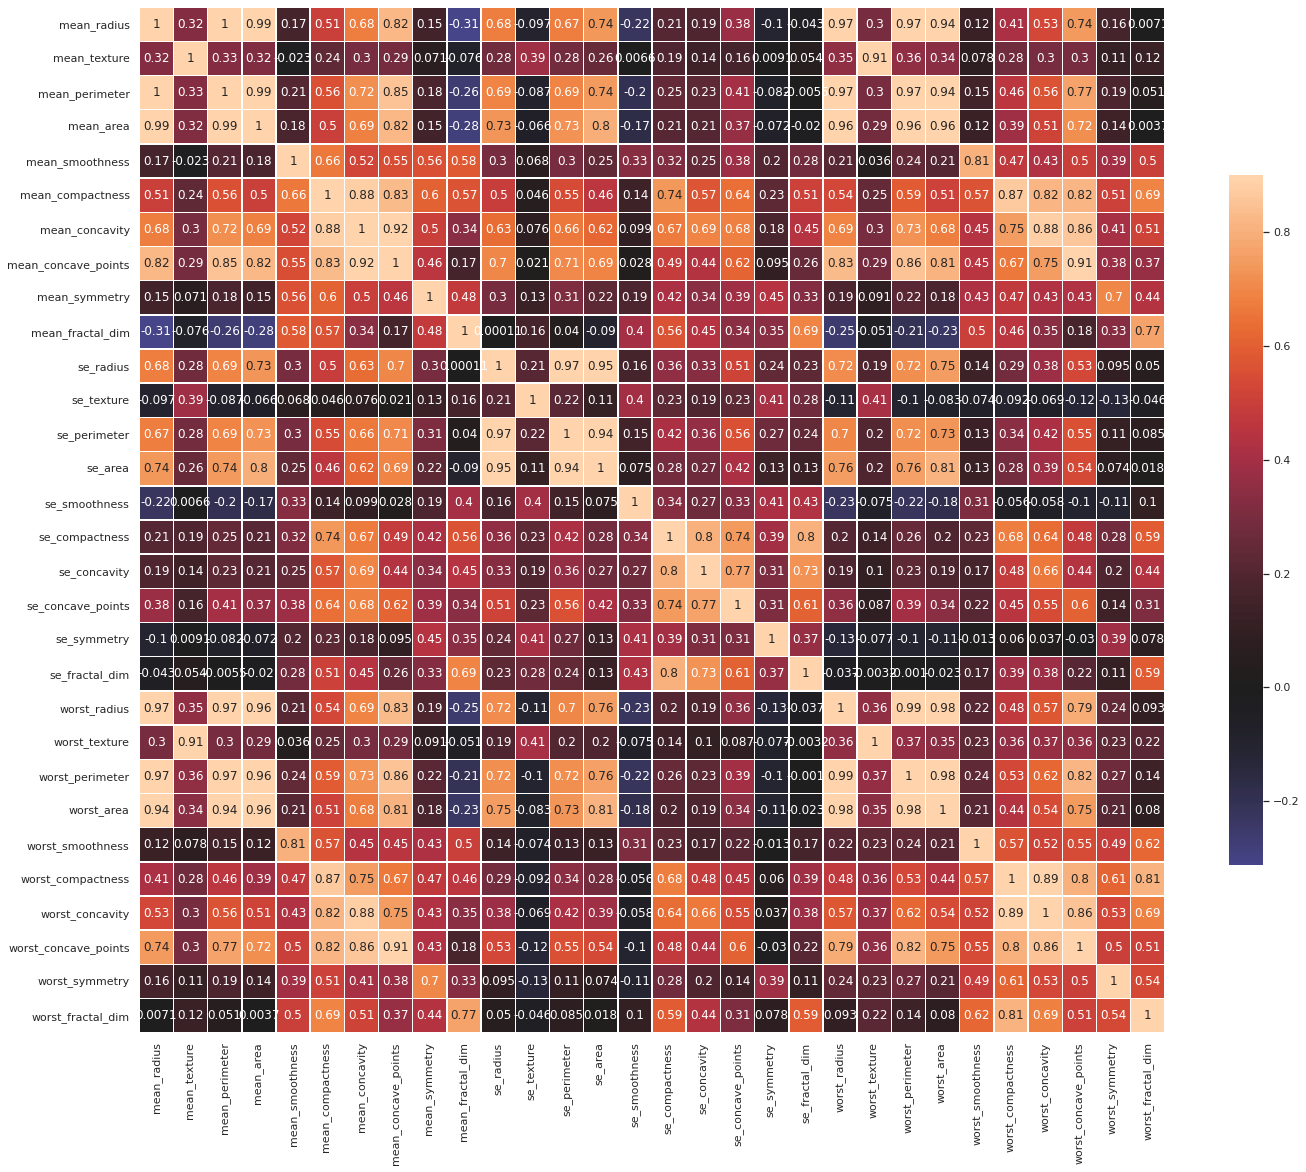

In [0]:
plt.figure(figsize=(20,20))
sns.set_style("white")
sns.set_context("notebook",font_scale=1)
sns.heatmap(data.corr(),vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [0]:
x = data.drop('Diagnosis',axis=1)
y = data['Diagnosis']

#### Splitting the data to train and test

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

#### Model Building and Evaluation of Model Performance 

### Decison Tree

In [0]:
Tree = DecisionTreeClassifier(max_depth=5,random_state=0)
model = Tree.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Classification report for Train :")
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

print("Classification report for Test :")
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,model.predict(x_test)))

Classification report for Train :
Accuracy for Train : 0.9874371859296482
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       249
   Malignant       0.99      0.98      0.98       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Classification report for Test :
Accuracy for Test : 0.935672514619883
              precision    recall  f1-score   support

      Benign       0.97      0.93      0.95       108
   Malignant       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



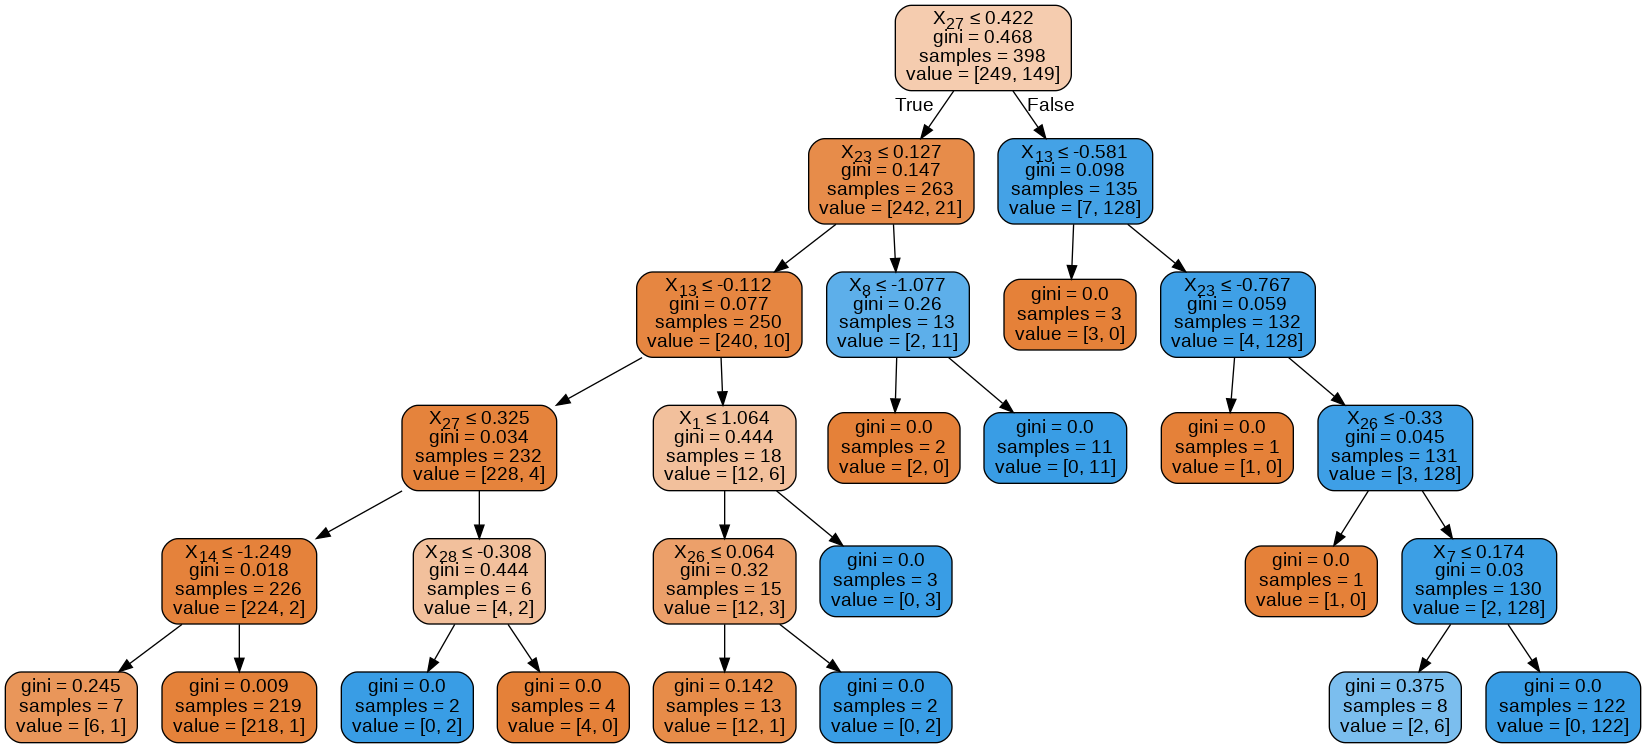

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
tree = StringIO()
export_graphviz(model, out_file=tree,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(tree.getvalue())  
Image(graph.create_png())

### Random Forest

In [0]:
Tree = RandomForestClassifier(n_estimators = 50, max_depth = 5,random_state=0)
model = Tree.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Classification report for Train :")
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

print("Classification report for Test :")
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,model.predict(x_test)))

Classification report for Train :
Accuracy for Train : 0.992462311557789
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       249
   Malignant       1.00      0.98      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Classification report for Test :
Accuracy for Test : 0.9532163742690059
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96       108
   Malignant       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



#### Feature Importance Plot

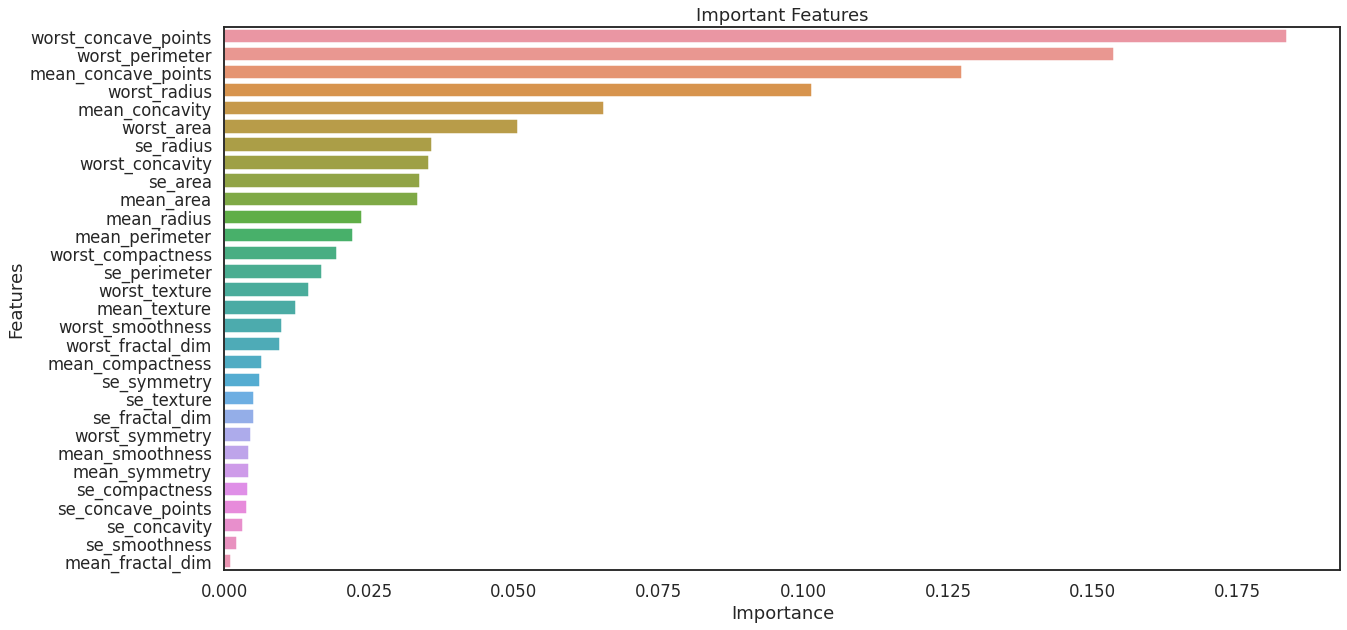

In [0]:
Feature_importance = pd.DataFrame({"Features":x.columns,"Importance":model.feature_importances_})
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True)

plt.figure(figsize = (20,10))
sns.set_style("white");
sns.set_context("talk",font_scale=1);
ax = sns.barplot(x='Importance',y='Features',data = Feature_importance);
ax.set_title("Important Features");

In [0]:
print("Top 10 features of data are :")
Feature_importance.sort_values(by=['Importance'],ascending=False)[:10]['Features']

Top 10 features of data are :


27    worst_concave_points
22         worst_perimeter
7      mean_concave_points
20            worst_radius
6           mean_concavity
23              worst_area
10               se_radius
26         worst_concavity
13                 se_area
3                mean_area
Name: Features, dtype: object

### SVM with RBF Kernel

In [0]:
SVM = SVC(kernel='rbf')

model = SVM.fit(x_train,y_train)
y_pred = model.predict(x_train)

print("Classification report for Train :")
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

print("Classification report for Test :")
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,model.predict(x_test)))

Classification report for Train :
Accuracy for Train : 0.992462311557789
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       249
   Malignant       1.00      0.98      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Classification report for Test :
Accuracy for Test : 0.9532163742690059
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       108
   Malignant       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### SVM with Linear Kernel

In [0]:
SVM = SVC(kernel='linear',probability=True)

model = SVM.fit(x_train,y_train)
y_pred = model.predict(x_train)

print("Classification report for Train :")
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

print("Classification report for Test :")
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,model.predict(x_test)))

Classification report for Train :
Accuracy for Train : 0.992462311557789
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       249
   Malignant       1.00      0.98      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Classification report for Test :
Accuracy for Test : 0.9532163742690059
              precision    recall  f1-score   support

      Benign       0.98      0.95      0.97       108
   Malignant       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



#### Conclusion :

The analysis of above data shows clearly that worst_concave_points, worst_perimeter, mean_concave_points, worst_radius, mean_concavity, worst_area are major attributes causing for cancer. SVM model with ‘rbf’ kernel gives the better results for precision and recall with  train accuracy of  98% and on test it is 93.56 %. The accuracy can be further improved by reducing the dimension using ‘principal Component analysis’ (PCA) or by feature selection methods.